In [57]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt

#print(get_all_factor_names())
factors = ['pe_ratio_ttm','amount','VOL10','close','open','high','low','pb_ratio_ttm','pb_ratio_ttm','ps_ratio_ttm','book_to_market_ratio_ttm','adjusted_earnings_per_share_ttm','return_on_equity_ttm','return_on_asset_net_profit_ttm','market_cap','market_cap_2','gross_profit_margin_ttm','fixed_asset_ratio_ttm','debt_to_asset_ratio_ttm','operating_profit_growth_ratio_ttm','net_profit_growth_ratio_ttm','return_on_asset_net_profit_ttm','SWS','SY','TAPI','TR','TRIX','turnover_rate','swing','pct_change']
#factors = ['book_to_market_ratio_ttm', 'pe_ratio_ttm', 'pb_ratio_ttm', 'ps_ratio_ttm', 'adjusted_earnings_per_share_ttm',
            #'return_on_equity_ttm', 'return_on_asset_ttm', 'gross_profit_margin_ttm', 'net_profit_growth_ratio_ttm', 'net_profit', 
             #         'operating_profit_growth_ratio_ttm', 'operate_profit', 'gross_profit_margin_ttm', 'net_profit_margin_ttm',
            #'revenue', 'market_cap', 'market_cap_2', 'debt_to_asset_ratio_ttm', 'non_current_asset_to_total_asset_ttm', 'current_asset_turnover_ttm']

stock_set = sector('health care', market='cn')
#print(stock_set)

a = get_all_factor_names()

fdf = get_factor(stock_set, factors, start_date='2020-01-03', end_date='2020-01-03')
fdf.head()#.T  #.T是转置，python3依然适用

fdf = fdf.reset_index()
col_name = fdf.index.name
fdf.drop(['date'],axis=1,inplace=True)
fdf.index = fdf['order_book_id']
fdf.drop(['order_book_id'],axis=1,inplace=True)
fdf.T

order_book_id,600276.XSHG,002644.XSHE,300404.XSHE,600129.XSHG,688068.XSHG,688266.XSHG,002411.XSHE,002901.XSHE,002001.XSHE,300122.XSHE,...,300289.XSHE,600530.XSHG,300273.XSHE,300636.XSHE,300049.XSHE,688366.XSHG,000509.XSHE,002022.XSHE,300181.XSHE,688321.XSHG
pe_ratio_ttm,7.776097e+01,4.138417e+01,3.682630e+02,1.335501e+02,NaN,NaN,8.440081e+01,5.359836e+01,2.201848e+01,3.908787e+01,...,-2.548714e+02,-7.800661e+00,4.356635e+01,5.661253e+01,2.257711e+03,41.335414,-5.497741e+01,2.836700e+01,9.143935e+01,6.328953e+02
amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOL10,8.554154e+01,7.256601e+00,1.439437e+01,1.117256e+01,46.348519,NaN,1.576008e+01,5.759910e+01,2.252923e+01,4.951535e+01,...,5.885083e+00,4.883457e+00,4.956178e+00,2.808084e+01,7.563615e+00,87.976540,2.439573e+00,1.141778e+01,5.016452e+00,5.579158e+01
close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pb_ratio_ttm,1.787319e+01,2.534040e+00,6.105204e+00,1.899613e+00,NaN,NaN,2.503813e+00,1.534419e+01,3.042495e+00,1.794776e+01,...,1.919954e+00,3.966628e+00,1.599465e+00,3.366978e+00,1.527658e+00,4.331051,1.288231e+02,2.714444e+00,2.331553e+00,3.222660e+01
ps_ratio_ttm,1.735472e+01,6.136988e+00,1.257992e+01,5.327500e-01,NaN,NaN,2.616090e+00,2.103912e+01,6.401942e+00,8.848037e+00,...,5.123822e+00,1.281648e+01,3.250356e+00,6.303732e+00,2.383277e+00,9.895997,3.106547e+01,2.672691e+00,3.594255e+00,1.293898e+02
book_to_market_ratio_ttm,5.594973e-02,3.946267e-01,1.637947e-01,5.264231e-01,NaN,NaN,3.993909e-01,6.517125e-02,3.286776e-01,5.571726e-02,...,5.208459e-01,2.521033e-01,6.252091e-01,2.970023e-01,6.545968e-01,0.230891,7.762582e-03,3.683996e-01,4.288987e-01,3.103026e-02


In [58]:
score = fdf['market_cap_2'].sort_values()

#score.head()

In [59]:
length = len(score)

In [60]:
score_endex = list(score.index)
#score_endex[1:2]

In [61]:
startdate = '2020-01-01'
enddate = '2020-02-01'
nextdate = '2020-03-01'
df = {}
circulating_market_cap = fdf['market_cap_2']
port1 = score_endex[0:length//5]
port2 = score_endex[length//5: 2*length//5]
port3 = score_endex[2*length//5: -2*length//5]
port4 = score_endex[-2*length//5: -length//5]
port5 = score_endex[-length//5: ]
print('port1 is:',port1)

port1 is: ['002868.XSHE', '603676.XSHG', '002898.XSHE', '603139.XSHG', '603880.XSHG', '603739.XSHG', '002950.XSHE', '002907.XSHE', '300313.XSHE', '002923.XSHE', '002873.XSHE', '002932.XSHE', '603229.XSHG', '603963.XSHG', '300801.XSHE', '002872.XSHE', '300453.XSHE', '603301.XSHG', '300583.XSHE', '300705.XSHE', '002864.XSHE', '002817.XSHE', '002940.XSHE', '300636.XSHE', '300254.XSHE', '300584.XSHE', '002826.XSHE', '002900.XSHE', '300683.XSHE', '300412.XSHE', '600671.XSHG', '002566.XSHE', '300519.XSHE', '300753.XSHE', '300404.XSHE', '603579.XSHG', '600767.XSHG', '300246.XSHE', '300452.XSHE', '300108.XSHE', '300562.XSHE', '300049.XSHE', '300723.XSHE', '300765.XSHE', '300314.XSHE', '300534.XSHE', '002880.XSHE', '000004.XSHE', '600080.XSHG', '603896.XSHG', '300030.XSHE', '002693.XSHE', '300677.XSHE', '000509.XSHE', '603811.XSHG', '000153.XSHE', '002551.XSHE', '600721.XSHG', '600781.XSHG', '300086.XSHE', '002432.XSHE', '300642.XSHE', '300485.XSHE', '002728.XSHE', '002173.XSHE', '603538.XSHG',

In [62]:
#circulating_market_cap
circulating_market_cap = circulating_market_cap.reset_index()
col_name = circulating_market_cap.index.name
circulating_market_cap.index = circulating_market_cap['order_book_id']

circulating_market_cap.drop(['order_book_id'],axis=1,inplace=True)
circulating_market_cap.T

order_book_id,600276.XSHG,002644.XSHE,300404.XSHE,600129.XSHG,688068.XSHG,688266.XSHG,002411.XSHE,002901.XSHE,002001.XSHE,300122.XSHE,...,300289.XSHE,600530.XSHG,300273.XSHE,300636.XSHE,300049.XSHE,688366.XSHG,000509.XSHE,002022.XSHE,300181.XSHE,688321.XSHG
market_cap_2,3.785165e+11,3.727796e+09,1.615188e+09,6.211236e+09,NaN,NaN,2.262359e+10,2.301253e+09,4.885772e+10,4.552247e+10,...,2.501108e+09,3.868800e+09,2.973984e+09,1.325327e+09,1.771747e+09,NaN,2.038935e+09,6.089310e+09,2.351494e+09,NaN


In [63]:
def calculate_port_monthly_return(port, startdate, enddate, nextdate, circulating_market_cap): 
    #print(port)
    close1 = get_price(port, startdate, enddate, frequency='1d',fields='close')#, ['close']) 
    #print('close1 is:',close1)
    close2 = get_price(port, enddate, nextdate, frequency='1d',fields='close')#, ['close'])
    #print('close2 is:',close2)
    returns = pd.DataFrame(close2.iloc[0,:]/close1.iloc[0,:]-1)
    market_cap_i = pd.DataFrame()
    market_cap_i = circulating_market_cap[port]

    df = pd.DataFrame(returns.join(market_cap_i))
    df.columns = ['A','market_cap_2'] 
    df1 = pd.DataFrame(df.loc[:,'A'].multiply(df['market_cap_2'], axis="index")) 
    df1.columns = ['R{}'.format(x) for x in range(1, len(df1.columns) + 1)]
    df = df.join(df1)
    df.drop(['A','market_cap_2'],axis=1,inplace=True)
    #print('df is:',df.sum())
    
    weighted_m_return = df.sum()/(circulating_market_cap[port].sum())
    return weighted_m_return[0]

                       
calculate_port_monthly_return(port1, '2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])

0.01131034026872359

In [64]:
def calculate_benchmark_monthly_return(startdate, enddate, nextdate):    
    close1 = get_price(index_components('000001.XSHG'),startdate,enddate,frequency='1d',fields='close')
    #print('close1 is:',close1)
    close2 = get_price(index_components('000001.XSHG'),enddate, nextdate, frequency='1d',fields='close')
    #print('close2 is:',close2)
    benchmark_return = (close2.iloc[0,:]/close1.iloc[0,:]-1).sum()
    return benchmark_return

calculate_benchmark_monthly_return('2020-01-01','2020-02-01','2020-03-01')

/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900921.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900939.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900902.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900908.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900937.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: i

-151.32819564732387

In [65]:
benchmark_return = calculate_benchmark_monthly_return('2020-01-01', '2020-02-01', '2020-03-01')
df['port1'] = calculate_port_monthly_return(port1,'2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])
df['port2'] = calculate_port_monthly_return(port2,'2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])
df['port3'] = calculate_port_monthly_return(port3,'2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])
df['port4'] = calculate_port_monthly_return(port4,'2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])
df['port5'] = calculate_port_monthly_return(port5,'2020-01-01', '2020-02-01', '2020-03-01', fdf['market_cap_2'])
print(Series(df))
print('benchmark_return %s'%benchmark_return)

port1    0.011310
port2    0.026497
port3    0.045457
port4   -0.001523
port5   -0.010146
dtype: float64
benchmark_return -151.32819564732387


In [66]:
#因为研究模块取fundamental数据默认date为研究日期的前一天。所以要自备时间序列。按月取
year = ['2013','2014','2015','2016','2017','2018','2019']#
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
result = {}

for i in range(7*12):
    startdate1 = year[i//12] + '-' + month[i%12] + '-01' #为什么要4开始，是因为前面三天都没有数据
    try:
        enddate1 = year[(i+1)//12] + '-' + month[(i+1)%12] + '-01'
    except IndexError:
        enddate1 = '2020-01-01'
    try:
        nextdate1 = year[(i+2)//12] + '-' + month[(i+2)%12] + '-01'
    except IndexError:
        if enddate1 == '2020-01-01':
            nextdate1 = '2020-02-01'
        else:
            nextdate1 = '2020-01-01'
    #print('time %s'%startdate1)
    #print('time1 %s'%nextdate1)
    #print('time2 %s'%enddate1)
    fdf = get_factor(stock_set, factors, start_date=startdate1, end_date=startdate1)
   
    try:
        fdf.head()#.T  #.T是转置，python3依然适用
        fdf = fdf.reset_index()
        col_name = fdf.index.name
        fdf.drop(['date'],axis=1,inplace=True)
        fdf.index = fdf['order_book_id']
        fdf.drop(['order_book_id'],axis=1,inplace=True)
        #print('fdf is:',fdf)
        #fdf = get_factors(startdate,factors)
        CMV = fdf['market_cap_2']
        #print('CMV is:\n',CMV)
        df = pd.DataFrame(np.zeros(6*30).reshape(6,30),index = ['port1','port2','port3','port4','port5','benchmark'],columns = factors)
        #print('df is:',df)
        for fac in factors:
            #print('fac is:',fac)
            score = fdf[fac].sort_values()
            #print('score is:',score)
            score_endex = list(score.index)
            port1 = score_endex[0:length//5]
            #print('port1 is:',port1)
            port2 = score_endex[length//5+1: 2*length//5]
            port3 = score_endex[2*length//5+1: -2*length//5]
            port4 = score_endex[-2*length//5+1: -length//5]
            port5 = score_endex[-length//5+1: ]
            #print('port5 is:',port5)

            df.loc['port1',fac] = calculate_port_monthly_return(port1,startdate1,enddate1,nextdate1,fdf['market_cap_2'])
            df.loc['port2',fac] = calculate_port_monthly_return(port2,startdate1,enddate1,nextdate1,fdf['market_cap_2'])
            df.loc['port3',fac] = calculate_port_monthly_return(port3,startdate1,enddate1,nextdate1,fdf['market_cap_2'])
            df.loc['port4',fac] = calculate_port_monthly_return(port4,startdate1,enddate1,nextdate1,fdf['market_cap_2'])
            df.loc['port5',fac] = calculate_port_monthly_return(port5,startdate1,enddate1,nextdate1,fdf['market_cap_2'])
            df.loc['benchmark',fac] = calculate_benchmark_monthly_return(startdate1,enddate1,nextdate1)
        #print('factor %s'%fac)
        result[i+1]=df
    except:
        print('haha')
        
monthly_return = pd.Panel(result)
print('monthly_return is:',monthly_return)

monthly_return[:,:,'pe_ratio_ttm']

(monthly_return[:,:,'pe_ratio_ttm'].T+1).cumprod().tail()

haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
haha
monthly_return is: <class 'pandas.core.panel.Panel'>
Dimensions: 12 (items) x 6 (major_axis) x 30 (minor_axis)
Items axis: 47 to 83
Major_axis axis: port1 to benchmark
Minor_axis axis: pe_ratio_ttm to pct_change


,port1,port2,port3,port4,port5,benchmark
75,1.371280,1.263592,1.299284,1.341107,5.904234,1.099112e+13
76,1.234271,1.105722,1.146587,1.237069,4.424459,-1.904989e+15
79,1.172007,1.077461,1.119907,1.193690,4.078022,1.189242e+17
80,1.233743,1.145725,1.235076,1.342733,4.036244,1.176078e+18
83,1.174126,1.110501,1.185825,1.247811,3.774204,-5.231819e+19


In [67]:
((monthly_return[:,:,'pe_ratio_ttm']+1).T).cumprod().tail()

,port1,port2,port3,port4,port5,benchmark
75,1.371280,1.263592,1.299284,1.341107,5.904234,1.099112e+13
76,1.234271,1.105722,1.146587,1.237069,4.424459,-1.904989e+15
79,1.172007,1.077461,1.119907,1.193690,4.078022,1.189242e+17
80,1.233743,1.145725,1.235076,1.342733,4.036244,1.176078e+18
83,1.174126,1.110501,1.185825,1.247811,3.774204,-5.231819e+19


In [68]:
total_return = {}
annual_return = {}
excess_return = {}
win_prob = {}
loss_prob = {}
effect_test = {}
MinCorr = 0.3
Minbottom = -0.05
Mintop = 0.05

factors = ['pe_ratio_ttm','amount','VOL10','close','open','high','low','pb_ratio_ttm','pb_ratio_ttm','ps_ratio_ttm','book_to_market_ratio_ttm','adjusted_earnings_per_share_ttm','return_on_equity_ttm','return_on_asset_net_profit_ttm','market_cap','market_cap_2','gross_profit_margin_ttm','fixed_asset_ratio_ttm','debt_to_asset_ratio_ttm','operating_profit_growth_ratio_ttm','net_profit_growth_ratio_ttm','return_on_asset_net_profit_ttm','SWS','SY','TAPI','TR','TRIX','turnover_rate','swing','pct_change']
# factors = ['book_to_market_ratio_ttm', 'pe_ratio_ttm', 'pb_ratio_ttm', 'ps_ratio_ttm', 'adjusted_earnings_per_share_ttm',
#            'return_on_equity_ttm', 'return_on_asset_ttm', 'gross_profit_margin_ttm', 'net_profit_growth_ratio_ttm', 'net_profit', 
#                      'operating_profit_growth_ratio_ttm', 'operate_profit', 'gross_profit_margin_ttm', 'net_profit_margin_ttm',
#            'revenue', 'market_cap', 'market_cap_2', 'debt_to_asset_ratio_ttm', 'non_current_asset_to_total_asset_ttm', 'current_asset_turnover_ttm']

for fac in factors:
    print('fac is:',fac)
    effect_test[fac] = {}
    monthly = monthly_return[:,:,fac]
    try:
        total_return[fac] = ((monthly_return[:,:,fac]+1).T).cumprod().iloc[-1,:]-1
        #print('total_return is:\n',total_return)
        annual_return[fac] = ((total_return[fac]+1)**(1./6))-1
        #print('annual_return is:\n',annual_return)
        if np.isnan(annual_return[fac][-1]):
            print('到了')
            annual_return[fac][-1] = 0
        excess_return[fac] = annual_return[fac]- annual_return[fac][-1]
            #print('annual_return[fac] is:\n',annual_return[fac])
            #print('annual_return[fac][-1] is:\n',annual_return[fac][-1])
        #print('excess_return is:\n',excess_return)
        #判断因子有效性
        #1.年化收益与组合序列的相关性 大于 阈值
        effect_test[fac][1] = annual_return[fac][0:5].corr(Series([1,2,3,4,5],index = annual_return[fac][0:5].index))
        #print('effect_test[fac][1] is:',effect_test[fac][1])
        #2.高收益组合跑赢概率
        #因子小，收益小，port1是输家组合，port5是赢家组合
        if total_return[fac][0] < total_return[fac][-2]:
            print('到输赢1了')
            loss_excess = monthly.iloc[0,:]-monthly.iloc[-1,:]
            print('monthly is:',monthly)
            print('loss_excess is:',loss_excess)
            loss_prob[fac] = loss_excess[loss_excess<0].count()/float(len(loss_excess))
            win_excess = monthly.iloc[-2,:]-monthly.iloc[-1,:]
            win_prob[fac] = win_excess[win_excess>0].count()/float(len(win_excess))
        
            effect_test[fac][3] = [win_prob[fac],loss_prob[fac]]
        
            #超额收益
            effect_test[fac][2] = [excess_return[fac][-2]*100,excess_return[fac][0]*100]
            print()
            
        #因子小，收益大，port1是赢家组合，port5是输家组合
        else:
            print('到输赢2了')
            loss_excess = monthly.iloc[-2,:]-monthly.iloc[-1,:]
            loss_prob[fac] = loss_excess[loss_excess<0].count()/float(len(loss_excess))
            win_excess = monthly.iloc[0,:]-monthly.iloc[-1,:]
            win_prob[fac] = win_excess[win_excess>0].count()/float(len(win_excess))
        
            effect_test[fac][3] = [win_prob[fac],loss_prob[fac]]
        
            #超额收益
            effect_test[fac][2] = [excess_return[fac][0]*100,excess_return[fac][-2]*100]
    except:
        print('haha')
#由于选择的因子较多，test标准选取适当严格一些
#effect_test[1]记录因子相关性，>0.7或<-0.7合格
#effect_test[2]记录【赢家组合超额收益，输家组合超额收益】
#effect_test[3]记录赢家组合跑赢概率和输家组合跑输概率。【>0.6,>0.4】合格 (因实际情况，跑输概率暂时不考虑)

fac is: pe_ratio_ttm
到了
到输赢1了
monthly is:                   47         48        51         56         57         59  \
port1       0.011705  -0.030183  0.039950   0.008037   0.027016  -0.026263   
port2       0.000671  -0.051161  0.014150   0.027077   0.013109  -0.035494   
port3      -0.000817  -0.064152 -0.008319   0.036132   0.052322  -0.029558   
port4       0.015714  -0.049914  0.010925   0.026304   0.003351   0.006363   
port5       2.506223  -0.109577  0.041654   0.339925   0.117710  -0.136123   
benchmark  42.253126 -27.459200  3.585373  53.684318  11.954511 -68.834990   

                   74          75          76         79        80         83  
port1        0.196491    0.114205   -0.099913  -0.050446  0.052675  -0.048322  
port2        0.149848    0.137145   -0.124937  -0.025560  0.063357  -0.030744  
port3        0.153665    0.147805   -0.117524  -0.023269  0.102838  -0.039876  
port4        0.180028    0.124177   -0.077576  -0.035066  0.124859  -0.070694  
port5      

In [69]:
DataFrame(effect_test).T

,1,2,3
pe_ratio_ttm,0.73943,"[24.77787028459588, 2.7115180477321754]","[0.4166666666666667, 0.5833333333333334]"
amount,-0.663576,"[5.318141723729908, 2.7475600232066855]","[0.4166666666666667, 0.5833333333333334]"
VOL10,0.556269,"[5.360983636063343, 3.255043507274502]","[0.4166666666666667, 0.5833333333333334]"
close,-0.663576,"[5.318141723729908, 2.7475600232066855]","[0.4166666666666667, 0.5833333333333334]"
open,-0.663576,"[5.318141723729908, 2.7475600232066855]","[0.4166666666666667, 0.5833333333333334]"
high,-0.663576,"[5.318141723729908, 2.7475600232066855]","[0.4166666666666667, 0.5833333333333334]"
low,-0.663576,"[5.318141723729908, 2.7475600232066855]","[0.4166666666666667, 0.5833333333333334]"
pb_ratio_ttm,NaN,NaN,NaN
ps_ratio_ttm,0.750038,"[25.295280943331157, 3.088780345963049]","[0.4166666666666667, 0.5833333333333334]"
book_to_market_ratio_ttm,0.714523,"[25.89682058426803, 4.093243416945946]","[0.4166666666666667, 0.5833333333333334]"


In [70]:
DataFrame(effect_test).T

effective_factors = ['pe_ratio_ttm','ps_ratio_ttm','book_to_market_ratio_ttm', 'market_cap', 'market_cap_2', 'gross_profit_margin_ttm','fixed_asset_ratio_ttm','operating_profit_growth_ratio_ttm','net_profit_growth_ratio_ttm']
DataFrame(total_return).loc[:,effective_factors].T

,port1,port2,port3,port4,port5,benchmark
pe_ratio_ttm,0.174126,0.110501,0.185825,0.247811,2.774204,-5.231819e+19
ps_ratio_ttm,0.200241,0.117599,0.145550,0.338071,2.869085,-5.231819e+19
book_to_market_ratio_ttm,0.272141,0.043899,0.189531,0.261013,2.981884,-5.231819e+19
market_cap,0.144970,0.110058,0.144102,0.281353,0.305625,-5.231819e+19
market_cap_2,0.145440,0.098716,0.155371,0.273970,0.227414,-5.231819e+19
gross_profit_margin_ttm,0.068747,0.210334,0.177101,0.431518,4.199507,-5.231819e+19
fixed_asset_ratio_ttm,0.144393,0.183168,0.223627,0.222752,4.330019,-5.231819e+19
operating_profit_growth_ratio_ttm,0.214455,0.099862,0.238399,0.217149,1.013538,-5.231819e+19
net_profit_growth_ratio_ttm,0.190343,0.120285,0.194209,0.237234,0.968087,-5.231819e+19


In [71]:
DataFrame(annual_return).loc[:,effective_factors].T

,port1,port2,port3,port4,port5,benchmark
pe_ratio_ttm,0.027115,0.017622,0.028814,0.037588,0.247779,0.0
ps_ratio_ttm,0.030888,0.018703,0.022906,0.049735,0.252953,0.0
book_to_market_ratio_ttm,0.040932,0.007186,0.029349,0.039409,0.258968,0.0
market_cap,0.022819,0.017554,0.022690,0.042185,0.045450,0.0
market_cap_2,0.022890,0.015814,0.024362,0.041182,0.034741,0.0
gross_profit_margin_ttm,0.011143,0.032328,0.027548,0.061613,0.316216,0.0
fixed_asset_ratio_ttm,0.022734,0.028429,0.034209,0.034085,0.321665,0.0
operating_profit_growth_ratio_ttm,0.032913,0.015991,0.036279,0.033294,0.123725,0.0
net_profit_growth_ratio_ttm,0.029466,0.019111,0.030023,0.036117,0.119457,0.0


In [72]:
df

,pe_ratio_ttm,amount,VOL10,close,open,high,low,pb_ratio_ttm,pb_ratio_ttm,ps_ratio_ttm,...,net_profit_growth_ratio_ttm,return_on_asset_net_profit_ttm,SWS,SY,TAPI,TR,TRIX,turnover_rate,swing,pct_change
port1,-0.048322,-0.058804,-0.044608,-0.058804,-0.058804,-0.058804,-0.058804,-0.045784,-0.045784,-0.038064,...,-0.040689,-0.041220,-0.064431,-0.056382,-0.050147,-0.034027,-0.027965,-0.058804,-0.058804,-0.058804
port2,-0.030744,-0.065146,-0.037947,-0.065146,-0.065146,-0.065146,-0.065146,-0.024182,-0.024182,-0.046021,...,-0.041166,-0.050558,-0.044150,-0.038007,-0.045202,-0.042850,-0.043016,-0.065146,-0.065146,-0.065146
port3,-0.039876,-0.034855,-0.056227,-0.034855,-0.034855,-0.034855,-0.034855,-0.054491,-0.054491,-0.031076,...,-0.066568,-0.039018,-0.058260,-0.062792,-0.033179,-0.054854,-0.056005,-0.034855,-0.034855,-0.034855
port4,-0.070694,-0.059664,-0.057827,-0.059664,-0.059664,-0.059664,-0.059664,-0.066319,-0.066319,-0.070886,...,-0.057218,-0.063887,-0.039377,-0.057287,-0.067815,-0.062282,-0.068245,-0.059664,-0.059664,-0.059664
port5,-0.064922,-0.040940,-0.051120,-0.040940,-0.040940,-0.040940,-0.040940,-0.047082,-0.047082,-0.039746,...,-0.024678,-0.057438,0.058898,-0.047525,-0.028697,-0.042360,-0.054478,-0.040940,-0.040940,-0.040940
benchmark,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,...,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300,-45.485300


In [73]:
(df.T+1).cumprod()

,port1,port2,port3,port4,port5,benchmark
pe_ratio_ttm,0.951678,0.969256,0.960124,0.929306,0.935078,-4.448530e+01
amount,0.895716,0.906114,0.926659,0.873860,0.896797,1.978942e+03
VOL10,0.855760,0.871729,0.874555,0.823327,0.850952,-8.803383e+04
close,0.805438,0.814940,0.844073,0.774204,0.816115,3.916211e+06
open,0.758075,0.761850,0.814652,0.728012,0.782704,-1.742138e+08
high,0.713497,0.712219,0.786258,0.684575,0.750660,7.749954e+09
low,0.671541,0.665821,0.758853,0.643730,0.719928,-3.447590e+11
pb_ratio_ttm,0.640795,0.649720,0.717502,0.601039,0.686032,1.533671e+13
pb_ratio_ttm,0.611457,0.634008,0.678405,0.561179,0.653732,-6.822581e+14
ps_ratio_ttm,0.588182,0.604830,0.657323,0.521399,0.627749,3.035046e+16


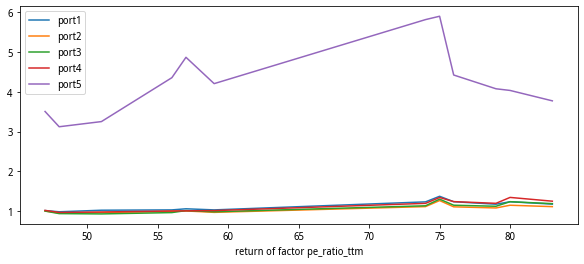

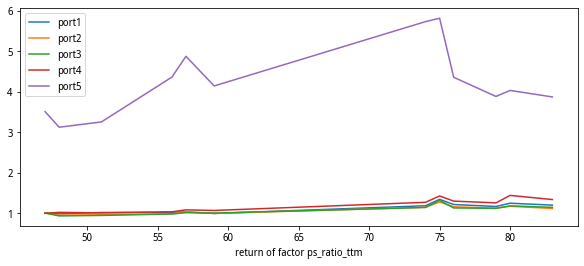

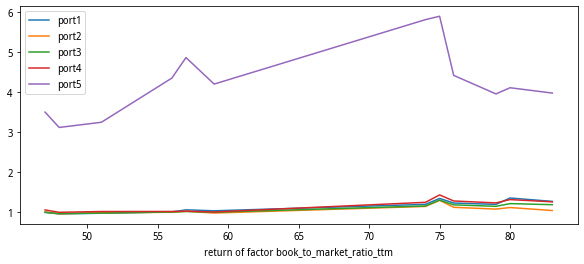

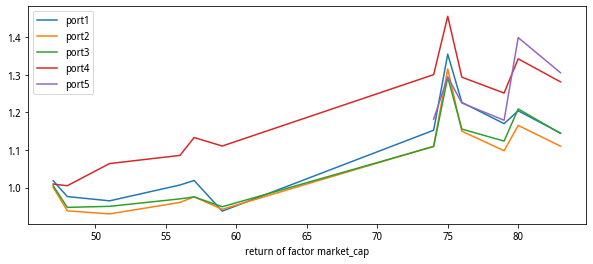

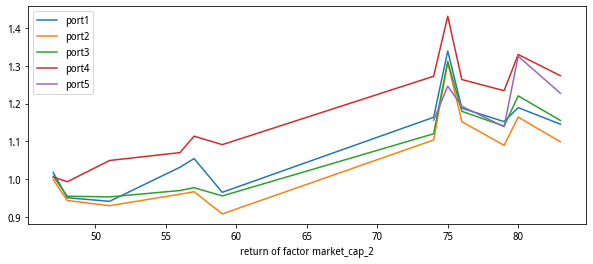

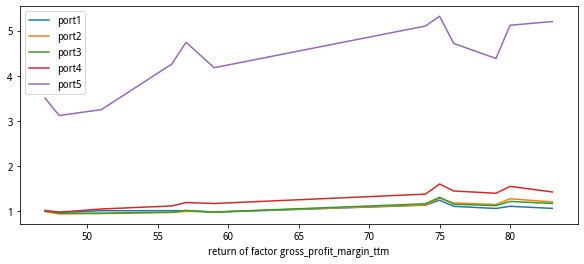

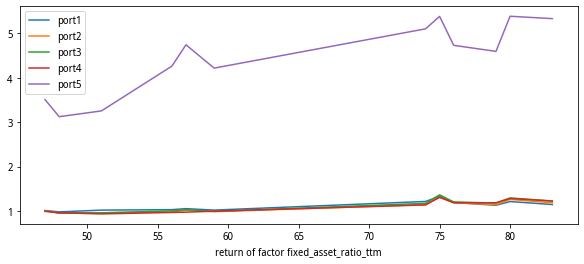

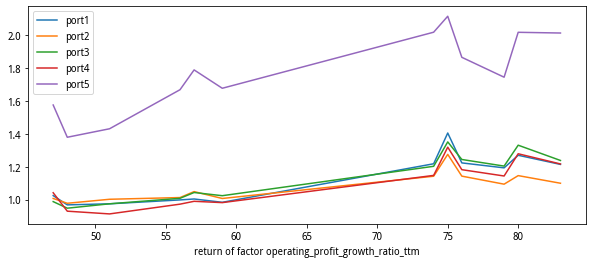

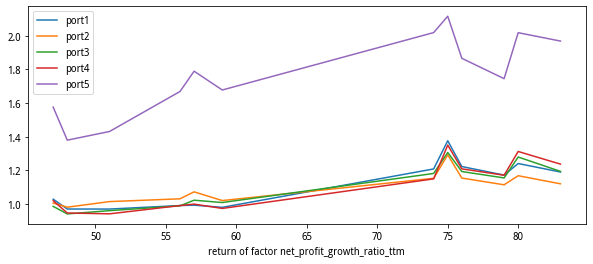

In [74]:
def draw_return_picture(df):
    plt.figure(figsize =(10,4))
    plt.plot((df.T+1).cumprod().iloc[:,0], label = 'port1')
    plt.plot((df.T+1).cumprod().iloc[:,1], label = 'port2')
    plt.plot((df.T+1).cumprod().iloc[:,2], label = 'port3')
    plt.plot((df.T+1).cumprod().iloc[:,3], label = 'port4')
    plt.plot((df.T+1).cumprod().iloc[:,4], label = 'port5')
    #plt.plot((df.T+1).cumprod().iloc[:,5], label = 'benchmark')
    plt.xlabel('return of factor %s'%fac)
    plt.legend(loc=0)
for fac in effective_factors:
    draw_return_picture(monthly_return[:,:,fac])

In [92]:
def score_stock(fdate):
    #B/M, L/A, P/R, capitalization, circulating_cap, circulating_market_cap, market_cap, operating_revenue
    #八个因子越小收益越大,分值越大，应降序排；gross_profit_margin, inc_net_profit_year_on_year, 
    #inc_operation_profit_year_on_year三个因子越大收益越大应顺序排
    effective_factors = {'pe_ratio_ttm':True,'ps_ratio_ttm':True,'book_to_market_ratio_ttm':True, 'market_cap':True, 'market_cap_2':True, 'gross_profit_margin_ttm':True,'fixed_asset_ratio_ttm':True,'operating_profit_growth_ratio_ttm':True,'net_profit_growth_ratio_ttm':True}
    fdf = get_factors(fdate)
    #print('fdf some is:',fdf)
    score = {}
    for fac,value in effective_factors.items():
        score[fac] = fdf[fac].rank(ascending = value,method = 'first')
    print(DataFrame(score).T.sum().sort_values(ascending = False).head(5))
    score_stock = list(DataFrame(score).T.sum().sort_values(ascending = False).index)
    return score_stock,fdf['market_cap_2']

In [93]:
def get_factors(fdate):
    factors = ['pe_ratio_ttm','ps_ratio_ttm','book_to_market_ratio_ttm', 'market_cap', 'market_cap_2', 'gross_profit_margin_ttm','fixed_asset_ratio_ttm','operating_profit_growth_ratio_ttm','net_profit_growth_ratio_ttm']
    
    stock_set = sector('health care', market='cn')
    a = get_all_factor_names()

    fdf = get_factor(stock_set, factors, start_date='2020-01-03', end_date='2020-01-03')
    fdf.head()#.T  #.T是转置，python3依然适用

    fdf = fdf.reset_index()
    col_name = fdf.index.name
    fdf.drop(['date'],axis=1,inplace=True)
    fdf.index = fdf['order_book_id']
    fdf.drop(['order_book_id'],axis=1,inplace=True)
    return fdf.iloc[:,-9:]
    

[score_result,circulating_market_cap] = score_stock('2020-01-05')

order_book_id
300630.XSHE    1975.0
000661.XSHE    1925.0
300601.XSHE    1921.0
300573.XSHE    1912.0
603658.XSHG    1905.0
dtype: float64


In [83]:
import pandas as pd
import numpy as np

In [94]:
year = ['2013','2014','2015','2016','2017','2018','2019']

month = ['01','02','03','04','05','06','07','08','09','10','11','12']
factors = ['pe_ratio_ttm','ps_ratio_ttm','book_to_market_ratio_ttm', 'market_cap', 'market_cap_2', 'gross_profit_margin_ttm','fixed_asset_ratio_ttm','operating_profit_growth_ratio_ttm','net_profit_growth_ratio_ttm']
result = {}

for i in range(7*12):

    startdate = year[i//12] + '-' + month[i%12] + '-01'
    try:
        enddate = year[(i+1)//12] + '-' + month[(i+1)%12] + '-01'
    except IndexError:
        enddate = '2020-01-01'
    try:
        nextdate = year[(i+2)//12] + '-' + month[(i+2)%12] + '-01'
    except IndexError:
        if enddate == '2020-01-01':
            nextdate = '2020-02-01'
        else:
            nextdate = '2020-01-01'
    #print('time %s'%startdate)
    #综合11个因子打分后，划分几个组合
    df = pd.DataFrame(np.zeros(7),index = ['Top20','port1','port2','port3','port4','port5','benchmark'])
    print('df is:',df)
    [score,circulating_market_cap] = score_stock(startdate)
    port0 = score[:20]
    #print('port0 is:',port0)
    port1 = score[: len(score)//5]
    #print('port1 is:',port1)
    port2 = score[ len(score)//5+1: 2*len(score)//5]
    port3 = score[ 2*len(score)//5+1: -2*len(score)//5]
    port4 = score[ -2*len(score)//5+1: -len(score)//5]
    port5 = score[ -len(score)//5+1: ]
    #print('port5 is:',port5)
    #print(len(score))
    #a = fdf['market_cap_2']
    #calculate_port_monthly_return(port0,startdate,enddate,nextdate,fdf['market_cap_2'])
    #df.loc['Top20'] = 1
    try:
        #print('奇怪的地方先看看：\n',calculate_port_monthly_return(port0,startdate,enddate,nextdate,fdf['market_cap_2'])
        
        print('到tpo20了吗？')
        df.loc['port1'] = calculate_port_monthly_return(port1,startdate,enddate,nextdate,circulating_market_cap)
        df.loc['port2'] = calculate_port_monthly_return(port2,startdate,enddate,nextdate,circulating_market_cap)
        df.loc['port3'] = calculate_port_monthly_return(port3,startdate,enddate,nextdate,circulating_market_cap)
        df.loc['port4'] = calculate_port_monthly_return(port4,startdate,enddate,nextdate,circulating_market_cap)
        df.loc['port5'] = calculate_port_monthly_return(port5,startdate,enddate,nextdate,circulating_market_cap)
        df.loc['benchmark'] = calculate_benchmark_monthly_return(startdate,enddate,nextdate)
        print('df is:',df)
        result[i+1]=df
        print('result is:',result)
    except:
        print('haha')

    df = pd.Panel(result)

df is:              0
Top20      0.0
port1      0.0
port2      0.0
port3      0.0
port4      0.0
port5      0.0
benchmark  0.0
order_book_id
300630.XSHE    1975.0
000661.XSHE    1925.0
300601.XSHE    1921.0
300573.XSHE    1912.0
603658.XSHG    1905.0
dtype: float64
到tpo20了吗？


/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900921.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900939.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900902.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900908.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: invalid order_book_id: 900937.XSHG
  warnings.warn("invalid order_book_id: {}".format(ob), stacklevel=0)
/usr/local/lib/python3.6/site-packages/rqdatac/validators.py:173: UserWarning: i

df is:                    0
Top20       0.000000
port1       0.084089
port2       0.111467
port3       0.101037
port4       0.102171
port5       0.110920
benchmark  63.080042
result is: {1:                    0
Top20       0.000000
port1       0.084089
port2       0.111467
port3       0.101037
port4       0.102171
port5       0.110920
benchmark  63.080042}
df is:              0
Top20      0.0
port1      0.0
port2      0.0
port3      0.0
port4      0.0
port5      0.0
benchmark  0.0
order_book_id
300630.XSHE    1975.0
000661.XSHE    1925.0
300601.XSHE    1921.0
300573.XSHE    1912.0
603658.XSHG    1905.0
dtype: float64
到tpo20了吗？
df is:                    0
Top20       0.000000
port1       0.098150
port2       0.062931
port3       0.057667
port4       0.074805
port5       0.048567
benchmark  22.421144
result is: {1:                    0
Top20       0.000000
port1       0.084089
port2       0.111467
port3       0.101037
port4       0.102171
port5       0.110920
benchmark  63.080042, 2:    

/usr/local/lib/python3.6/site-packages/rqdatac/client.py:190: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)
2020-01-02 INFO init
2020-01-02 INFO end_time is: 20200102
2020-01-03 INFO end_time is: 20200103
2020-01-06 INFO end_time is: 20200106
2020-01-06 INFO stocks_top10 is:
        ts_code
0  300630.XSHE
1  000661.XSHE
2  300601.XSHE
3  300573.XSHE
4  300558.XSHE
0  300529.XSHE
1  002821.XSHE
2  002007.XSHE
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-07 INFO end_time is: 20200107
2020-01-07 INFO stocks_top10 is:
        ts_code
0  300630.XSHE
1  000661.XSHE
2  300601.XSHE
3  300573.XSHE
4  300558.XSHE
0  300529.XSHE
1  002821.XSHE
2  002007.XSHE
2020-01-07 WARN 订单创建失败: 下单量

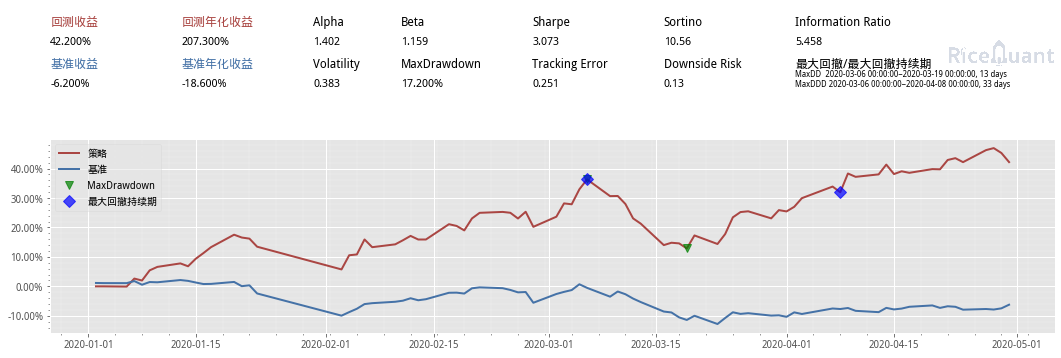

In [2]:
from rqalpha.api import *
from rqalpha import run_func
import tushare as ts
import pandas as pd
import numpy as np
import math
import talib
import datetime
import time
from pandas.plotting import register_matplotlib_converters
config = {
  "base": {
    "start_date": "2020-01-01",
    "end_date": "2020-05-01",   #若回测时间太短，则说这个收益率是不可信的。短期的收益率不可靠。
    "frequency": "1d",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 1000000
    }
  },
  "extra": {
    "log_level": "warning",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    },
    "mongodb": {
        "enabled": False,
    }
  }
}         
                          

def init(context):
    context.last_stock_top10 = []
    logger.info("init")
    

def handle_bar(context,bar_dict):
    pro = ts.pro_api('9df5fd6df6dd3d636443c579e070eb5be91dc917372393709a0a37b7')

    #df_tr = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['turnover_rate'], ascending=False).head(500)
    #df_pe = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['pb'], ascending=False).head(500)
    #df_pb = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['pe'], ascending=False).head(500)
    
    stocks_top3 = pd.DataFrame()
    stocks_top4_6 = pd.DataFrame()
    stocks_top10 = pd.DataFrame()
    
    end_time=context.now.strftime("%Y%m%d")
    print('end_time is:',end_time)
    
    year = ['2020']
    month = ['01','02','03','04','05']
    day = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
    
    for i in range(28):
        if end_time == '2020'+'01'+ day[i+3]:    
            stocks_top3['ts_code'] = ['300630.XSHE','000661.XSHE','300601.XSHE','300573.XSHE','300558.XSHE']
            stocks_top4_6['ts_code'] = ['300529.XSHE','002821.XSHE','002007.XSHE']#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            print('stocks_top10 is:\n',stocks_top10)
            #context.last_stock_top10 = stocks_top10
            
            if i ==0:
                #找出已经剔除的股票
                if len(context.last_stock_top10) > 0:
                    print('这里有len了吗？',len(context.last_stock_top10))
                    df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                    print(df_stock_removed)
                    #卖掉已经不在列表的股票
                    for past_stock in df_stock_removed['ts_code']:
                        #print('第一个past_stock is：',past_stock)
                        past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                        order_target_percent(past_stock_format,0)
                        #order_target_value(past_stock_format,0)
                        #print('********卖出的股票*********')
                        print(past_stock)
    
                context.last_stock_top10 = stocks_top10
    
                print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')

    
    for j in range(27):
        if end_time == '2020'+'02'+ day[j+3]:
            print('你来到二月了吗？')
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','000661.XSHE','300558.XSHE','300529.XSHE']
            stocks_top4_6['ts_code'] = ['300573.XSHE','002821.XSHE','300759.XSHE']#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
               #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')
            
      
    
    for k in range(29):   
        if end_time == '2020'+'03'+ day[k+2]:
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','000661.XSHE','300558.XSHE','300573.XSHE']
            stocks_top4_6['ts_code'] = ['002821.XSHE','300529.XSHE','300759.XSHE']#,'002007.XSHE','300436.XSHE']#,'002007.XSHE','300436.XSHE'#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
                    #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')
        
 
        if end_time == '2020'+'04'+ day[k+1]:
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','300573.XSHE','000661.XSHE','300529.XSHE']
            stocks_top4_6['ts_code'] = ['300558.XSHE','002821.XSHE','300759.XSHE']#,'000403.XSHE','300760.XSHE']]#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
                    #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')


#     #找出已经剔除的股票
#     if len(context.last_stock_top10) > 0:
#         df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
#         print(df_stock_removed)
#         #卖掉已经不在列表的股票
#         for past_stock in df_stock_removed['ts_code']:
#             past_stock_format =past_stock.replace('SH','XSHG').replace('SZ','XSHE')
#             order_target_percent(past_stock_format,0)
#             #order_target_value(past_stock_format,0)
#             print('********卖出的股票*********')
#             print(past_stock)
    
#     context.last_stock_top10 = stocks_top10
    
#     print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
#     for stock  in  stocks_top3['ts_code']:
#         #转换tushare股票代码格式为米筐代码格式
#         #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
#         #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
#         #print('stock_format is:\n',stock_format)
#         order_target_percent(stock,1./7)
#         #order_target_value(stock_format,100000)
#         print('*****持仓情况*****')
#     for stock in stocks_top4_6['ts_code']:
#         order_target_percent(stock,1./7)
#         print('*****持仓情况*****')
    
    
results=run_func(init=init, handle_bar=handle_bar,config=config)

2020-01-02 INFO init
2020-01-02 INFO end_time is: 20200102
2020-01-03 INFO end_time is: 20200103
2020-01-06 INFO end_time is: 20200106
2020-01-06 INFO stocks_top10 is:
        ts_code
0  300630.XSHE
1  000661.XSHE
2  300601.XSHE
3  300573.XSHE
4  300558.XSHE
0  300529.XSHE
1  002821.XSHE
2  002007.XSHE
3  300357.XSHE
4  300436.XSHE
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 INFO *****持仓情况*****
2020-01-06 WARN 订单创建失败: 下单量为0
2020-01-06 INFO *****持仓情况*****
2020-01-06 WARN 订单创建失败: 下单量为0
2020-01-06 INFO *****持仓情况*****
2020-01-07 INFO end_time is: 20200107
2020-01-07 INFO stocks_top10 is:
        ts_code
0  300630.XSHE
1  000661.XSHE
2  300601.XSHE
3  300573.XSHE
4  300558.XSHE
0  300529.XSHE
1  002821.XSHE
2  002007.XSHE
3  300357.XSHE
4  300436.XSHE
2020-01-07 WARN 订单创建失败: 下单量为0
2020-01-07 INFO *****持仓情况****

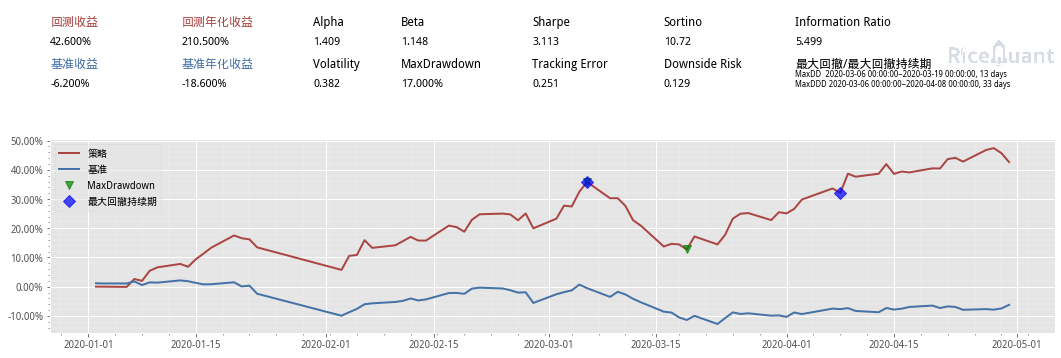

In [3]:
from rqalpha.api import *
from rqalpha import run_func
import tushare as ts
import pandas as pd
import numpy as np
import math
import talib
import datetime
import time
from pandas.plotting import register_matplotlib_converters
config = {
  "base": {
    "start_date": "2020-01-01",
    "end_date": "2020-05-01",   #若回测时间太短，则说这个收益率是不可信的。短期的收益率不可靠。
    "frequency": "1d",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 1000000
    }
  },
  "extra": {
    "log_level": "warning",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    },
    "mongodb": {
        "enabled": False,
    }
  }
}         
                          

def init(context):
    context.last_stock_top10 = []
    logger.info("init")
    

def handle_bar(context,bar_dict):
    pro = ts.pro_api('9df5fd6df6dd3d636443c579e070eb5be91dc917372393709a0a37b7')

    #df_tr = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['turnover_rate'], ascending=False).head(500)
    #df_pe = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['pb'], ascending=False).head(500)
    #df_pb = pro.daily_basic(ts_code='', trade_date='20180726', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb').sort_values(by=['pe'], ascending=False).head(500)
    
    stocks_top3 = pd.DataFrame()
    stocks_top4_6 = pd.DataFrame()
    stocks_top10 = pd.DataFrame()
    
    end_time=context.now.strftime("%Y%m%d")
    print('end_time is:',end_time)
    
    year = ['2020']
    month = ['01','02','03','04','05']
    day = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
    
    for i in range(28):
        if end_time == '2020'+'01'+ day[i+3]:    
            stocks_top3['ts_code'] = ['300630.XSHE','000661.XSHE','300601.XSHE','300573.XSHE','300558.XSHE']
            stocks_top4_6['ts_code'] = ['300529.XSHE','002821.XSHE','002007.XSHE','300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            print('stocks_top10 is:\n',stocks_top10)
            #context.last_stock_top10 = stocks_top10
            
            if i ==0:
                #找出已经剔除的股票
                if len(context.last_stock_top10) > 0:
                    print('这里有len了吗？',len(context.last_stock_top10))
                    df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                    print(df_stock_removed)
                    #卖掉已经不在列表的股票
                    for past_stock in df_stock_removed['ts_code']:
                        #print('第一个past_stock is：',past_stock)
                        past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                        order_target_percent(past_stock_format,0)
                        #order_target_value(past_stock_format,0)
                        #print('********卖出的股票*********')
                        print(past_stock)
    
                context.last_stock_top10 = stocks_top10
    
                print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')

    
    for j in range(27):
        if end_time == '2020'+'02'+ day[j+3]:
            print('你来到二月了吗？')
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','000661.XSHE','300558.XSHE','300529.XSHE']
            stocks_top4_6['ts_code'] = ['300573.XSHE','002821.XSHE','300759.XSHE','300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
               #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')
            
      
    
    for k in range(29):   
        if end_time == '2020'+'03'+ day[k+2]:
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','000661.XSHE','300558.XSHE','300573.XSHE']
            stocks_top4_6['ts_code'] = ['002821.XSHE','300529.XSHE','300759.XSHE','002007.XSHE','300436.XSHE']#,'002007.XSHE','300436.XSHE'#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
                    #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')
        
 
        if end_time == '2020'+'04'+ day[k+1]:
            stocks_top3['ts_code'] = ['300630.XSHE','300601.XSHE','300573.XSHE','000661.XSHE','300529.XSHE']
            stocks_top4_6['ts_code'] = ['300558.XSHE','002821.XSHE','300759.XSHE','000403.XSHE','300760.XSHE']#,'300357.XSHE','300436.XSHE']#,'000403.XSHE','300015.XSHE','300760.XSHE','300759.XSHE']#,'000020.XSHE','300043.XSHE','300155.XSHE','300354.XSHE','002583.XSHE','300515.XSHE']
            stocks_top10 = stocks_top3.append(stocks_top4_6)
            #context.last_stock_top10 = stocks_top10
        
                    #找出已经剔除的股票
            if len(context.last_stock_top10) > 0:
                df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
                print(df_stock_removed)
                #卖掉已经不在列表的股票
                for past_stock in df_stock_removed['ts_code']:
                    past_stock_format =past_stock#.replace('SH','XSHG').replace('SZ','XSHE')
                    order_target_percent(past_stock_format,0)
                    #order_target_value(past_stock_format,0)
                    #print('********卖出的股票*********')
                    print(past_stock)
    
            context.last_stock_top10 = stocks_top10
    
            print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
            for stock  in  stocks_top3['ts_code']:
                #转换tushare股票代码格式为米筐代码格式
                #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
                #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
                #print('stock_format is:\n',stock_format)
                order_target_percent(stock,1./7)
                #order_target_value(stock_format,100000)
                print('*****持仓情况*****')
            for stock in stocks_top4_6['ts_code']:
                order_target_percent(stock,1./7)
                print('*****持仓情况*****')


#     #找出已经剔除的股票
#     if len(context.last_stock_top10) > 0:
#         df_stock_removed = context.last_stock_top10[~ context.last_stock_top10['ts_code'].isin(stocks_top10['ts_code'])]
#         print(df_stock_removed)
#         #卖掉已经不在列表的股票
#         for past_stock in df_stock_removed['ts_code']:
#             past_stock_format =past_stock.replace('SH','XSHG').replace('SZ','XSHE')
#             order_target_percent(past_stock_format,0)
#             #order_target_value(past_stock_format,0)
#             print('********卖出的股票*********')
#             print(past_stock)
    
#     context.last_stock_top10 = stocks_top10
    
#     print('context.last_stock_top10 is:\n',context.last_stock_top10)
    
#     for stock  in  stocks_top3['ts_code']:
#         #转换tushare股票代码格式为米筐代码格式
#         #stock_format = stock.replace('SZ','XSHE')#replace('SH','XSHG').
#         #stock_format = stock.replace('XSHG','XSHE')#replace('SH','XSHG')
#         #print('stock_format is:\n',stock_format)
#         order_target_percent(stock,1./7)
#         #order_target_value(stock_format,100000)
#         print('*****持仓情况*****')
#     for stock in stocks_top4_6['ts_code']:
#         order_target_percent(stock,1./7)
#         print('*****持仓情况*****')
    
    
results=run_func(init=init, handle_bar=handle_bar,config=config)

In [4]:
results['sys_analyser']['portfolio']

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2020-01-02,1000000.000,0.00,1.000,1000000.000,1.000000,1000000.0
2020-01-03,1000000.000,0.00,1.000,1000000.000,1.000000,1000000.0
2020-01-06,1688.990,997513.00,1.000,999201.990,0.999202,1000000.0
2020-01-07,1688.990,1024692.00,0.999,1026380.990,1.026381,1000000.0
2020-01-08,2171.851,1017626.65,1.026,1019798.501,1.019799,1000000.0
2020-01-09,1235.526,1053112.56,1.020,1054348.086,1.054348,1000000.0
2020-01-10,1557.866,1064535.26,1.054,1066093.126,1.066093,1000000.0
2020-01-13,2304.111,1075606.94,1.066,1077911.051,1.077911,1000000.0
2020-01-14,2844.505,1065327.26,1.078,1068171.765,1.068172,1000000.0
